In [ ]:
# Example 07: Loading and plotting trace of wheel velocity
#In this example we will show how to

#1. Load in trials, wheel and pose data
#2. Smoothing the wheel trace

In [ ]:
# 1. Load trials, wheel and pose data
from brainbox.io.one import SessionLoader
from one.api import ONE
import numpy as np

one = ONE()

eid='288bfbf3-3700-4abe-b6e4-130b5c541e61'
pid='05ec6af9-6c83-422d-91a3-ba815fa65e92'

sl = SessionLoader(eid=eid, one=one)
sl.load_trials()
sl.load_wheel()

In [14]:
sl.wheel

,times,position,velocity,acceleration
0,0.214679,-0.001534,0.000000,0.000000
1,0.215679,-0.001542,-0.008788,-8.788197
2,0.216679,-0.001550,-0.008727,0.061113
3,0.217679,-0.001558,-0.008656,0.070708
4,0.218679,-0.001566,-0.008578,0.078644
...,...,...,...,...
4320675,4320.889648,238.872086,0.122910,-20.946722
4320676,4320.890625,238.872879,0.104107,-18.803179
4320677,4320.891602,238.874146,0.087375,-16.732231
4320678,4320.892578,238.875305,0.072621,-14.753661


In [12]:
sl.trials

,intervals_bpod_0,intervals_bpod_1,stimOff_times,goCueTrigger_times,goCue_times,firstMovement_times,contrastRight,rewardVolume,stimOn_times,contrastLeft,feedbackType,choice,feedback_times,response_times,probabilityLeft,intervals_0,intervals_1
0,0.0000,3.437502,85.290103,83.653834,83.654734,84.004679,1.000,1.5,83.653634,NaN,1.0,-1.0,84.227543,84.227435,0.5,82.352631,85.790141
1,3.9013,10.867703,92.720360,91.337098,91.338099,91.530679,NaN,1.5,91.336932,0.125,1.0,1.0,91.662400,91.662302,0.5,86.253940,93.220422
2,11.3860,17.084402,98.937039,97.157335,97.158017,97.334679,NaN,1.5,97.157150,1.000,1.0,1.0,97.881944,97.881838,0.5,93.738725,99.437144
3,17.5349,21.737402,103.590107,101.957158,101.957970,102.175679,NaN,1.5,101.956970,0.125,1.0,1.0,102.536079,102.535962,0.5,99.887644,104.090175
4,22.2082,25.870502,107.723293,106.236797,106.237609,106.438679,0.125,1.5,106.236642,NaN,1.0,-1.0,106.666799,106.666702,0.5,104.560976,108.223323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2684.8327,2748.047103,2830.583147,2767.917524,2767.918414,NaN,0.250,0.0,2767.917314,NaN,-1.0,0.0,2827.919780,2827.919048,0.2,2767.204219,2830.419069
499,2748.9525,2753.674402,2835.546350,2831.783676,2831.784427,2831.937679,1.000,0.0,2831.379934,NaN,-1.0,1.0,2833.492756,2833.491988,0.2,2831.324473,2836.046408
500,2754.4717,2773.227103,2846.116193,2837.416516,2837.417397,NaN,0.000,1.5,2837.416363,NaN,1.0,-1.0,NaN,2854.052133,0.2,2836.843712,2855.599247
501,2774.0481,2779.090503,NaN,2857.146255,NaN,NaN,0.250,1.5,NaN,NaN,1.0,-1.0,NaN,2859.915575,0.2,2856.420250,2861.462689


Text(0, 0.5, 'Acceleration')

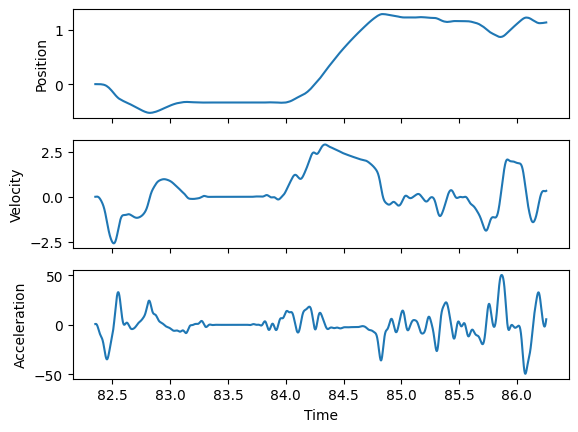

In [3]:
# 2. Smoothing the wheel trace
# When using the sessionloader the wheel trace is automatically smoothed and the velocity and acceleration computed
t0 = sl.trials['intervals_0']
t1 = sl.trials['intervals_1']
idx = np.searchsorted(sl.wheel['times'], np.r_[t0, t1])

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, sharex=True)
axs[0].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['position'][idx[0]:idx[1]] - sl.wheel['position'][idx[0]]) # subtract first position point
axs[0].set_ylabel('Position')
axs[1].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['velocity'][idx[0]:idx[1]])
axs[1].set_ylabel('Velocity')
axs[2].plot(sl.wheel['times'][idx[0]:idx[1]], sl.wheel['acceleration'][idx[0]:idx[1]])
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Acceleration')